# Aprendizaje Computacional  

## Mario Graff (mgraffg@ieee.org, mario.graff@infotec.mx)  
## [https://github.com/ingeotec](https://github.com/ingeotec)
## [https://github.com/mgraffg](https://github.com/mgraffg)
## CONACYT - INFOTEC

# Temas  

1. Introducción  
2. Aprendizaje supervisado  
3. Métodos paramétricos  
4. Métodos no-paramétricos  
5. Máquinas de kernel  
6. Métodos no convencionales de aprendizaje  
7. Diseño y análisis de experimentos de aprendizaje  
8. Aplicaciones

In [1]:
%pylab inline
from sklearn.datasets import make_blobs
import numpy as np
def boundary(x, y, m):
    px = []
    py = []
    for y0 in y:
        pr = m.predict(np.vstack((x, [y0] * x.shape[0])).T)
        df = np.fabs(pr[1:] - pr[:-1])
        step = np.where(df > 0)[0]
        if len(step):
            for x0 in step:
                py.append(y0)
                px.append(x[x0])
    return px, py

Populating the interactive namespace from numpy and matplotlib


# Máquinas de soporte

* $\mathbf w' \cdot \mathbf x_t  + w_0\geq 1$ para todo $r_t = 1$
* $\mathbf w' \cdot \mathbf x_t  + w_0 \leq -1$ para todo $r_t = -1$

* $r_t (\mathbf w' \mathbf x_t + w_0) \geq 1 $

* Distancia al plano es:  
$\frac{\mid \mathbf w' \cdot \mathbf x_t + w_0 \mid}{\mid \mid \mathbf w \mid \mid}$

* $r_t \frac{\mid \mathbf w' \cdot \mathbf x_t + w_0 \mid}{\mid \mid \mathbf w \mid \mid} \geq \rho$

* $\min \frac{1}{2} \mid \mid \mathbf w \mid \mid ^2$   
   sujeto a $r_t (\mathbf w' \mathbf x_t + w_0) \geq 1, \forall t$ 

# Problema binario

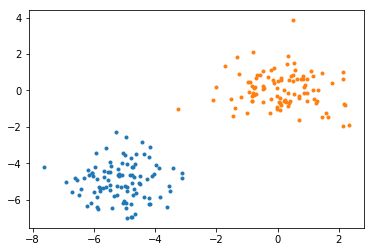

In [2]:
centers = [(-5, -5), (0, 0)]
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

# Función de Decisión

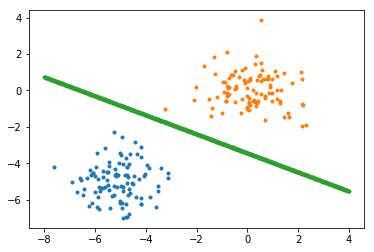

In [3]:
from sklearn.svm import LinearSVC
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')
m = LinearSVC(dual=False).fit(X, y)
px, py = boundary(np.linspace(-8, 4, 1000), np.linspace(-8, 4, 1000), m)
_ = pylab.plot(px, py, '.')

# Distancia a Hiperplano

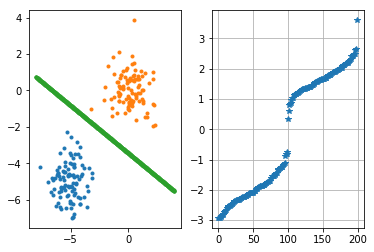

In [4]:
d = np.dot(X, m.coef_[0]) + m.intercept_
d.sort()
pylab.subplot(1, 2, 1)
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')
m = LinearSVC(dual=False).fit(X, y)
px, py = boundary(np.linspace(-8, 4, 1000), np.linspace(-8, 4, 1000), m)
_ = pylab.plot(px, py, '.')
pylab.subplot(1, 2, 2)
pylab.grid()
_ = pylab.plot(d, '*')

* Problema de optimización cuadrático
* Complejidad depende de $d$

# Nueva Formulación

* Transformar el problema a un problema sin restricciones   
$L_p = \frac{1}{2} \mid \mid \mathbf w \mid \mid^2 - \sum_t \alpha_t r_t (\mathbf w' \cdot \mathbf x_t + w_0) + \sum_t \alpha_t$
* El dual es maximizar $L_p$ con respecto a $\alpha_t$
* Sujeto a que el gradiente de $L_p$ con respecto a $\mathbf w$ y $w_0$ sea $0$

* $\frac{\partial L_p}{\partial \mathbf w} = 0 \rightarrow \mathbf w = \sum_t \alpha_t r_t \mathbf x_t$

* $\alpha_t > 0$   
   Vectores de soporte

* $g(\mathbf x) =  \mathbf w' \cdot \mathbf x + w_0  $ 
* $g(\mathbf x) = \sum_t \alpha_t r_t \mathbf x_t \cdot \mathbf x + w_0$

# Función de decision

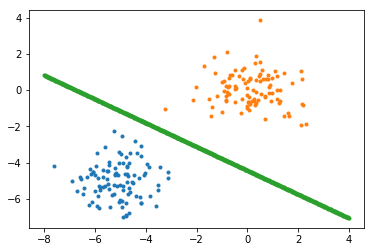

In [5]:
from sklearn.svm import SVC
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')
m = SVC(kernel='poly', degree=1).fit(X, y)
px, py = boundary(np.linspace(-8, 4, 1000), np.linspace(-8, 4, 1000), m)
_ = pylab.plot(px, py, '.')

# Vectores de soporte

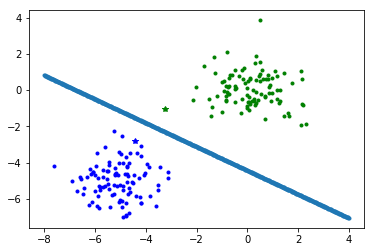

In [6]:
import numpy as np
for k, c in zip(np.unique(y), ['b', 'g']):
    pylab.plot(X[y == k, 0], X[y == k, 1], '%s.' % c)
Xp = X[m.support_]
yp = y[m.support_]
for k, c in zip(np.unique(yp), ['b', 'g']):
    pylab.plot(Xp[yp == k, 0], Xp[yp == k, 1], '%s*' % c)
_ = pylab.plot(px, py, '.')

# Caso no separable
* $r_t (\mathbf w' \cdot \mathbf x + w_0) \geq 1 - \xi_t$
* $L_p = \frac{1}{2} \mid \mid \mathbf w \mid \mid^2 + C \sum_t \xi_t $

* $L_d = \sum_t \alpha_t - \frac{1}{2} \sum_t \sum_s \alpha_t \alpha_s r_t r_s \mathbf x_t' \cdot \mathbf x_s $   
sujeto a $\sum_t \alpha_t r_t = 0$ y $0 \leq \alpha_t \leq C, \forall t$

# Kernel

* Remplazar $\mathbf x \rightarrow \mathbf \phi(\mathbf x)$

* $L_d = \sum_t \alpha_t - \frac{1}{2} \sum_t \sum_s \alpha_t \alpha_s r_t r_s \mathbf \phi(\mathbf x_t)' \cdot \mathbf \phi (\mathbf x_s) $   
sujeto a $\sum_t \alpha_t r_t = 0$ y $0 \leq \alpha_t \leq C, \forall t$

* $\mathbf \phi(\mathbf x_t)' \cdot \mathbf \phi (\mathbf x_s) \rightarrow \Re$
* $K(\mathbf x_t, \mathbf x_s) \rightarrow \Re$

* $g(\mathbf x) = \sum_t \alpha_t r_t K(\mathbf x_t, \mathbf x) + w_0$

* e.g. $K(\mathbf x_t, \mathbf x_s) = (\mathbf x_t \cdot \mathbf x_s )^d$

# Problema

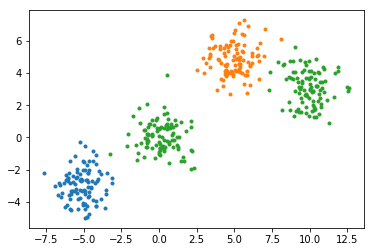

In [7]:
centers = [(-5, -3), (0, 0), (5, 5), (10, 3)]
X, y = make_blobs(n_samples=400, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
y[100:200] = 3
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

# Linear - SVM

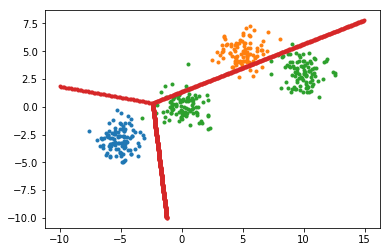

In [8]:
from sklearn.svm import LinearSVC, SVC
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')
m = LinearSVC().fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
_ = pylab.plot(px, py, '.')


# Linear SVM y Logistic Regression

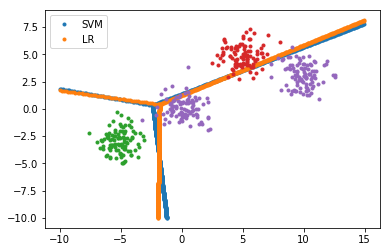

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
m = LinearSVC().fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
m = LogisticRegression().fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
legend(['SVM', 'LR'])
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

# Linear SVM y Kernel polinomial primer grado

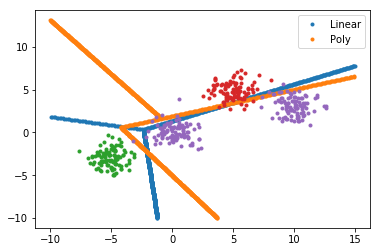

In [10]:
m = LinearSVC().fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
m = SVC(kernel='poly', degree=1).fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
legend(['Linear', 'Poly'])
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

# Vectores de soporte

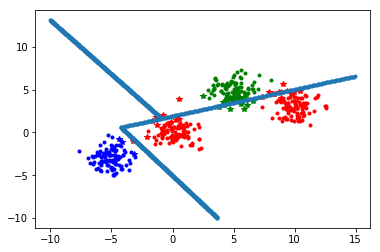

In [11]:
for k, c in zip(np.unique(y), ['b', 'g', 'r']):    
    pylab.plot(X[y == k, 0], X[y == k, 1], '%s.' % c)
Xp = X[m.support_]
yp = y[m.support_]
for k, c in zip(np.unique(yp), ['b', 'g', 'r']):
    pylab.plot(Xp[yp == k, 0], Xp[yp == k, 1], '%s*' % c)
_ = pylab.plot(px, py, '.')

# Kernel polinomial tercer grado

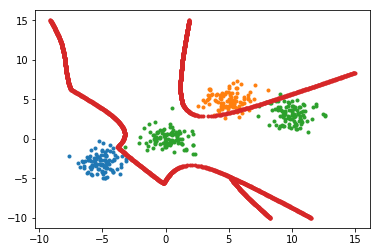

In [12]:
from sklearn.svm import SVC
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')
m = SVC(kernel='poly', degree=3).fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
_ = pylab.plot(px, py, '.')

# Vectores de soporte

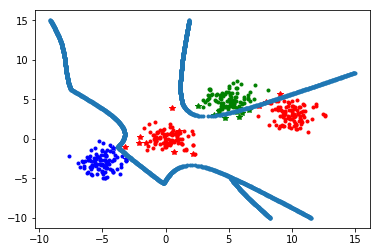

In [13]:
for k, c in zip(np.unique(y), ['b', 'g', 'r']):
    pylab.plot(X[y == k, 0], X[y == k, 1], '%s.' % c)
Xp = X[m.support_]
yp = y[m.support_]
for k, c in zip(np.unique(yp), ['b', 'g', 'r']):
    pylab.plot(Xp[yp == k, 0], Xp[yp == k, 1], '%s*' % c)
_ = pylab.plot(px, py, '.')